In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

```ts
// Generate positive points inside the circle.
  for (let i = 0; i < numSamples / 2; i++) {
    let r = randUniform(0, radius * 0.5);
    let angle = randUniform(0, 2 * Math.PI);
    let x = r * Math.sin(angle);
    let y = r * Math.cos(angle);
    let noiseX = randUniform(-radius, radius) * noise;
    let noiseY = randUniform(-radius, radius) * noise;
    let label = getCircleLabel({x: x + noiseX, y: y + noiseY}, {x: 0, y: 0});
    points.push({x: x, y: y, label: label});
  }

  // Generate negative points outside the circle.
  for (let i = 0; i < numSamples / 2; i++) {
    let r = randUniform(radius * 0.7, radius);
    let angle = randUniform(0, 2 * Math.PI);
    let x = r * Math.sin(angle);
    let y = r * Math.cos(angle);
    let noiseX = randUniform(-radius, radius) * noise;
    let noiseY = randUniform(-radius, radius) * noise;
    let label = getCircleLabel({x: x + noiseX, y: y + noiseY}, {x: 0, y: 0});
    points.push({x: x, y: y, label: label});
  }
```

![alt text](http://i.imgur.com/8tr67jL.png "A circle inside circle ")

In [78]:
class MoonGenerator :
    def genCirclePoints(self, numSamples=100, noise=0, radius=10., threshold=0., xOffset=0., yOffset=0.) :
        points=[]
        for i in range(int((numSamples))) :
            r = np.random.uniform(threshold, (threshold+radius)*0.5)
            angle = np.random.uniform(low=0, high=2*np.pi);
            x = xOffset + r * np.sin(angle);
            y = yOffset + r * np.cos(angle);
            noiseX = xOffset + np.random.uniform(low=-radius, high=radius)
            noiseY = yOffset + np.random.uniform(low=-radius, high=radius)
            if noise > 0 and np.random.randint(100) < noise :
                x = noiseX
                y = noiseY

            points.append([x, y]);
        return np.array(points)
    
    def cut(self, points, up=True, cutoffY=1) :
        if up == True :
            return [X for X in points if X[1] > cutoffY]
        elif up == False :
            return [X for X in points if X[1] < cutoffY]
        else :
            assert "Up has to be True/False"

In [84]:
# This splits dataset to training and classification data and saves it 
np.random.seed(1)
c1rad, c1thresh = 10., 5.
c2rad = 5.
mGen = MoonGenerator()
c1Points = mGen.genCirclePoints(numSamples=200, noise=0, radius=10. + iteration, threshold=5. + iteration)
c2Points = mGen.genCirclePoints(numSamples=200, noise=0, radius=10. + iteration, xOffset=5, threshold=5. + iteration)
X = mGen.cut(c1Points, up=True, cutoffY=-1)
Y = mGen.cut(c2Points, up=False, cutoffY=1)

<IPython.core.display.Javascript object>


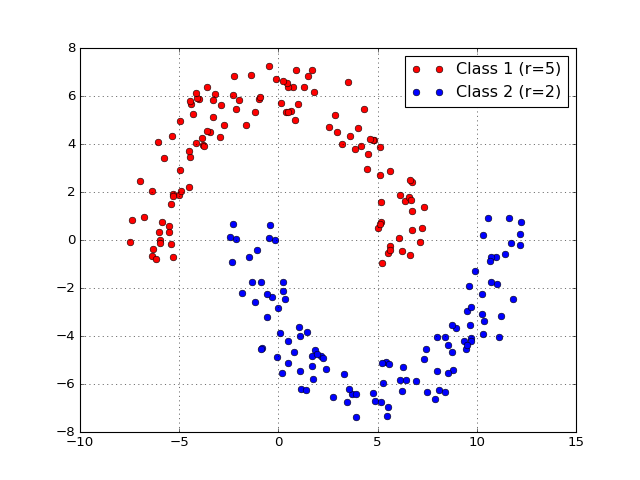

In [85]:
plt.clf()
plt.plot([point[0] for point in X], [point[1] for point in X], 'ro')
plt.plot([point[0] for point in Y], [point[1] for point in Y], 'bo')
plt.grid(1)
plt.legend(['Class 1 (r=5)', 'Class 2 (r=2)'])
plt.show()

In [232]:
np.random.randint(10) % 5 == 0

False